In [16]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

rcParams.update({'figure.figsize': (8, 6), 'axes.spines.top': False,
                 'axes.spines.right': False, 'axes.labelsize': 14,
                 'axes.titlesize': 16, 'axes.titleweight': 'bold',
                 'lines.linewidth': 3})

# Extensions to the Fire Model

## 1 Von Neumann Neighbors versus Moore Neighbors

### Loading of Results

In [2]:
# Set results path and column names
results_path = '../results/modified_fire_table.csv'
col_names = ['run_number', 'density', 'moore', 'step', 'pct_burned_trees',
             'percolated']

# Read csv then change column names
results = pd.read_csv(results_path, skiprows=6)
results.columns = col_names

In [4]:
# Get percolation and burned_tree results
percolation_results = (results.groupby(['run_number', 'density', 'moore'],
                                       as_index=False).percolated.max())
bt_results = (results.groupby(['run_number', 'density', 'moore'],
                              as_index=False).pct_burned_trees.max())

### Von Neumann Neighbors

In [5]:
# Aggregate results of von neumann neighbors
vn_bt = (bt_results[bt_results.moore == False].groupby('density')
         .pct_burned_trees.mean())
vn_percolation = (percolation_results[percolation_results.moore == False]
                  .groupby('density').percolated.mean() * 100)

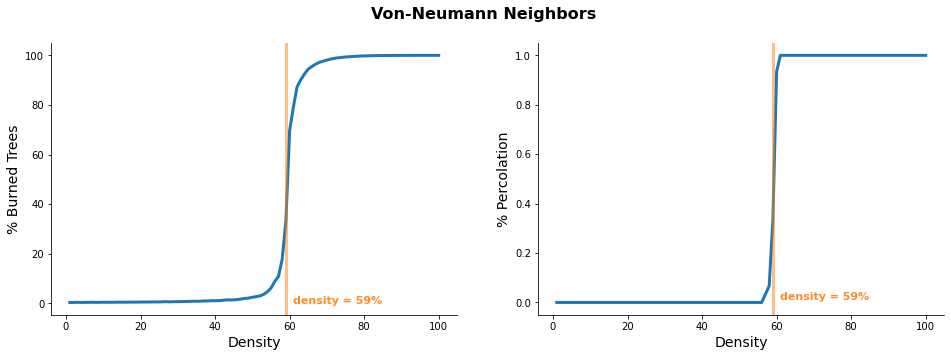

In [24]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot burned trees and percent percolation
vn_bt.plot(ax=axes[0])
vn_percolation.plot(ax=axes[1])

# Set axes labels and titles
axes[0].set_ylabel("% Burned Trees")
axes[1].set_ylabel("% Percolation")
for ax in axes:
    ax.set_xlabel("Density")

    # Set annotation line and text
    ax.axvline(59, color='tab:orange', alpha=0.50)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(61, 0.01, "density = 59%", color='tab:orange', weight='bold',
            alpha=0.90, fontsize=11)
fig.suptitle("Von-Neumann Neighbors", fontsize=16, weight='bold');

### Moore Neighobrs

In [10]:
# Aggregate results of moore neighbors
moore_bt = (bt_results[bt_results.moore == True].groupby('density')
         .pct_burned_trees.mean())
moore_percolation = (percolation_results[percolation_results.moore == True]
                  .groupby('density').percolated.mean() * 100)

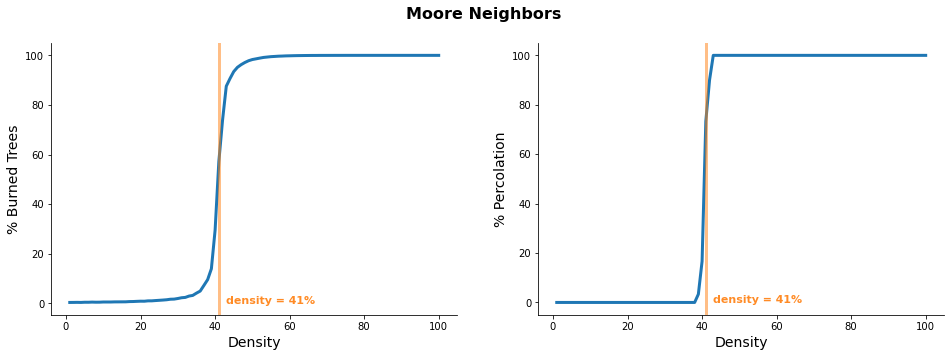

In [26]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot burned trees and percent percolation
moore_bt.plot(ax=axes[0])
moore_percolation.plot(ax=axes[1])

# Set axes labels and titles
axes[0].set_ylabel("% Burned Trees")
axes[1].set_ylabel("% Percolation")
for ax in axes:
    ax.set_xlabel("Density")

    # Set annotation line and text
    ax.axvline(41, color='tab:orange', alpha=0.50)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(43, 0.01, "density = 41%", color='tab:orange', weight='bold',
            alpha=0.90, fontsize=11)
fig.suptitle("Moore Neighbors", fontsize=16, weight='bold');